Notebook to compare global mean temperature at 2m from NextGEMS simulations (using Low Resolution Archive) with ERA5 eanalysis data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from aqua import Reader, catalogue
catalogue();

IFS	tco3999-ng5	2.8km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
IFS	tco2559-ng5	4km experiment, coupled with FESOM
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- interpolated_global	NN interpolation to 5400x2700 grid (lon=[-180,180], lat=[-90, 90])
	- lra-r100-mon	LRA monthly data 1x1 deg regular grid
IFS	tco1279-orca025	9km baseline, coupled to NEMO, deep conv ON
	- ICMGG_atm2d	original 2d output
	- ICMU_atm2d	original 2d output (lnsp)
	- ICMU_atm3d	original 3d output
	- lra-r100-mon	LRA monthly data 1x1 deg regular grid
IFS	test-tco2559	4km experiment, coupled with FESOM
	- ICMGG_atm2d	2d output
	- ICMU_atm3d	3d output
IFS	test-tco79	TCO79 test data
	- short	original 2d output
	- long	coarse IFS data 1y

FESOM	tco3999-ng5	2.5km experiment,

In [13]:
reader = Reader(model='ICON',exp='ngc2009',source="lra-r100-mon")
data = reader.retrieve()
data

<xarray.Dataset>
Dimensions:  (time: 27, lat: 180, lon: 360)
Coordinates:
  * time     (time) datetime64[ns] 2020-01-20 2020-02-01 ... 2022-03-01
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    2t       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    ci       (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    msl      (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mslhfl   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    msnsrf   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    msntrf   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    msshfl   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mtnsrf   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    mtntrf   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
    tprate   (time, lat, lon) float64 dask.array<chunksize=(12, 180, 360), meta=np.ndarray>
Attributes:
    history:  2023-05-11 13:00:40 retrieved by AQUA retriever;\n

Text(0.5, 1.0, 'global mean temperature at 2m')

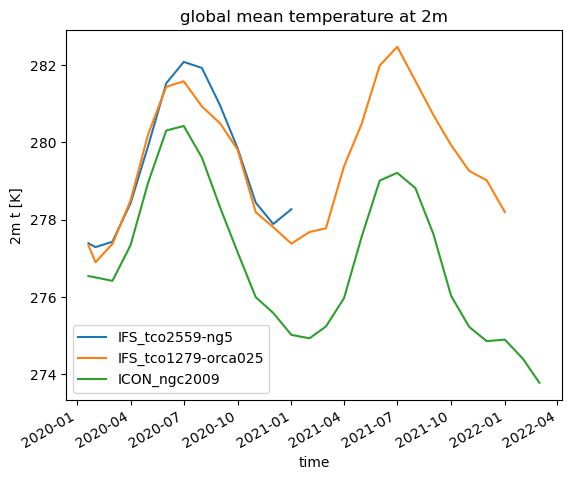

In [9]:
model_list = ["IFS", "ICON"]
exp_name = {"IFS": ["tco2559-ng5","tco1279-orca025"], "ICON": ["ngc2009"]}
source = "lra-r100-mon"

data = {}
for model in model_list:
    for exp in exp_name[model]:
        reader = Reader(model=model, exp=exp, source=source)
        data[(model, exp)] = reader.retrieve()

plt.figure()
for model in model_list:
    for exp in exp_name[model]:
        data[(model, exp)]["2t"].mean(dim=('lon','lat')).plot(label=f"{model}_{exp}")
plt.legend()
plt.ylabel("2m t [K]")
plt.title("global mean temperature at 2m")